# Surprise House Price Prediction Using MLR & Regularization Techniques


The solution is divided into the following sections: 
- Understanding Dataset & EDA
- Data cleaning
- Data preparation
- Model building and evaluation


### 1.  Understanding Dataset and Exploratory Data Analysis
Review the dataset and understand data elements, their attributes, values, ranges etc.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
house=pd.read_csv("train.csv")

In [3]:
#review the shape of the data
house.shape

(1460, 81)

In [4]:
#check the top 5 rows data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Review column level details, name of the columns, data type, null values 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Data cleaning

In [7]:
#review for null values
round(house.isnull().sum()/len(house),2).sort_values(ascending = False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageYrBlt      0.06
GarageFinish     0.06
GarageType       0.06
GarageQual       0.06
GarageCond       0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
LowQualFinSF     0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC 

In [8]:
Nullcolumnlist = ['Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageFinish','GarageType','GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','MasVnrType', 'MasVnrArea']

In [9]:
for i in Nullcolumnlist:
    print('Value counts for the column',i)
    print(house[i].value_counts(dropna=False))

Value counts for the column Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
Value counts for the column FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
Value counts for the column LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
24.0      19
68.0      19
73.0      18
55.0      17
72.0      17
63.0      17
79.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
57.0      12
43.0      12
40.0      12
76.0      11
69.0      11
88.0      10
34.0      10
53.0      10
86.0      10
92.0      10
35.0       9
84.0       9
44.0       9
77.0       9
62.0       9
61.0       8
93.0       8
96.0       8
98.0       8
120.0      7
107.0      7
58.0       7
95.0       7
30.0       6
41.0       6
110

In [10]:
#We will review the data fields to determine if the missing values are legitimate

##### Missing values summary and imputation plan:
#PoolQC           1.00  > Remove column since all values are missing
#MiscFeature      0.96  > Remove column since 96% of values are missing
#Alley            0.94  > Remove column since 94% of values are missing
#Fence            0.81  > NaN will be replaced with 'NoFence'
#FireplaceQu      0.47  > NaN value will be replaced with 'NoFirePl'
#LotFrontage      0.18  > Median imputation of missing values relative to he lot area
#GarageYrBlt      0.06  > Remove GarageYrBlt column since there is no garage and there are other columns to indicate built yr
#GarageFinish     0.06  > Nan value will be replaced with 'No Garage'
#GarageType       0.06  > Nan value will be replaced with 'No Garage'
#GarageQual       0.06  > Nan value will be replaced with 'No Garage'
#GarageCond       0.06  > Nan value will be replaced with 'No Garage'
#BsmtExposure     0.03  > NaN value will be replaced with 'No Bsmt' 
###### #> 1 Record where BasmtExposure in NaN whereas the BasmtCond is Gd. The value to be updated to'NoExp' since this is an unfinished basement
#BsmtQual         0.03  > NaN value will be replaced with 'No Bsmt
#BsmtCond         0.03  > NaN value will be replaced with 'No Bsmt
#BsmtFinType2     0.03  > NaN value will be replaced with 'No Bsmt
#BsmtFinType1     0.03  > NaN value will be replaced with 'No Bsmt
#MasVnrType       0.01  > NaN values will be replaced with 'None' for MasVnrType
#MasVnrArea       0.01  > NaN values will be replaced with '0' for MasVnrArea
#Electrical             > 1 NaN value will be replaced with the majority value 'SBrker'

house = house.drop(columns = ['PoolQC','MiscFeature','Alley','GarageYrBlt'])
house['Fence'].fillna('No Fence',inplace=True)
house['FireplaceQu'].fillna('No Fire Pl',inplace=True)
house['LotFrontage'].fillna(house['LotFrontage'].median(),inplace=True)
house['GarageFinish'].fillna('No Garage',inplace=True)
house['GarageType'].fillna('No Garage',inplace=True)
house['GarageQual'].fillna('No Garage',inplace=True)
house['GarageCond'].fillna('No Garage',inplace=True)
house['BsmtExposure'].fillna('No Bsmt',inplace=True)
house['BsmtQual'].fillna('No Bsmt',inplace=True)
house['BsmtCond'].fillna('No Bsmt',inplace=True)
house['BsmtFinType2'].fillna('No Bsmt',inplace=True)
house['BsmtFinType1'].fillna('No Bsmt',inplace=True)
house['MasVnrType'].fillna('None',inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)
house['Electrical'].fillna(house['Electrical'].mode(),inplace=True)

In [11]:
 # 1 record where BasmtExposure in NaN whereas the BasmtCond is Gd. The value to be updated to'NoExp'
house[(house['BsmtQual'] == 'Gd') & (house['BsmtExposure']== 'No Bsmt')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No Bsmt,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,No Fence,0,2,2006,WD,Normal,192500


In [12]:
house['BsmtExposure'][(house['BsmtQual'] == 'Gd') & (house['BsmtExposure']== 'No Bsmt')]='No'

In [13]:
house[(house['BsmtQual'] == 'Gd') & (house['BsmtExposure']== 'No Bsmt')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [15]:
house.shape

(1460, 77)

In [16]:
#review the individual Categorical variables
object_type = house.select_dtypes('object')

In [17]:
for cat_var in object_type:
    print(house[cat_var].value_counts(normalize=True,dropna=False))
    print('\n')
    

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342

In [18]:
#As per the review we have variables low % of occurences. Need to reduce the variables by introducing categories based on their distribution 

house['Neighborhood'] = house['Neighborhood'].replace(['Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste'],'Other_neighbor')
house['Condition1']=house['Condition1'].replace(['RRAn','PoSN','RRAe','PoSA','RRNn','RRNe'],'Other_Condition1')
house['Condition2']=house['Condition2'].replace(['RRNn','Artery','RRAn','RRAe','PosA'],'Other_Condition2')
house['HouseStyle']=house['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Other_Housestyle')
house['RoofStyle']=house['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other_RoofStyle')
house['RoofMatl']=house['RoofMatl'].replace(['WdShake','Membran','Metal','ClyTile','Roll'],'Other_RoofMatl')
house['Exterior1st']=house['Exterior1st'].replace(['CemntdBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc'],'Other_Exterior1st')
house['Exterior2nd']=house['Exterior2nd'].replace(['CmentBd','Wd shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'],'Other_Exterior2nd') 
house['ExterCond']=house['ExterCond'].replace(['Ex','Po'],'Other_ExterCond')
house['Foundation']=house['Foundation'].replace(['Stone','Wood'],'Other_Found')
house['GarageType']=house['GarageType'].replace(['CarPort','2Types'],'Other_GarageType')
house['GarageQual']=house['GarageQual'].replace(['Po','Ex','Gd'],'Other_GarageQual')
house['GarageCond']=house['GarageCond'].replace(['Gd','Po','Ex'],'Other_GarageCond')
house['SaleType']=house['SaleType'].replace(['ConLI','ConLw','CWD','Oth','Con'],'Other_SaleType')                                            

Text(0.5, 0, 'Price')

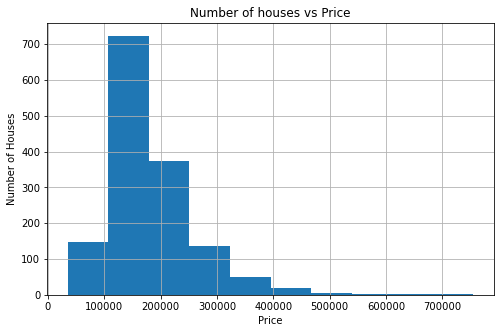

In [19]:
#review the Target variable 
house.hist('SalePrice',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
#As the target variable is right skewed, we will apply logarithmic transformation for use as a predictor variable.

Text(0.5, 0, 'log(Price)')

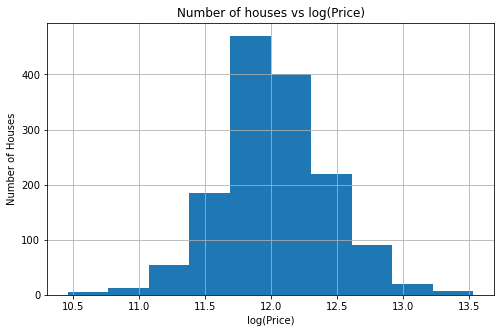

In [20]:
#Target variable is right skewed, transform the target variable using natural log.
house['log_price'] = np.log(house['SalePrice'])
house.hist('log_price',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

In [21]:
#Other Numeric data review
numeric_data= house.select_dtypes(include=['int64','float64'])

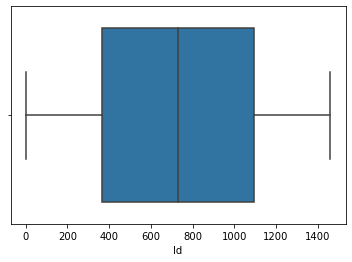

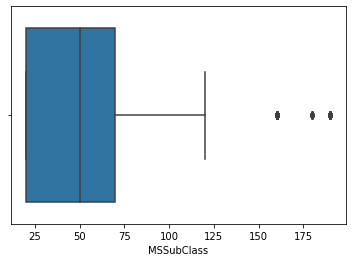

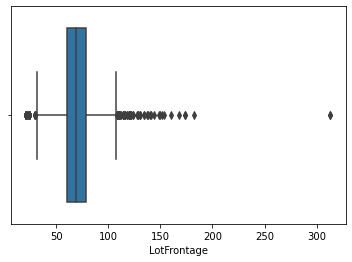

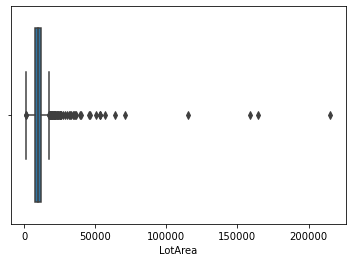

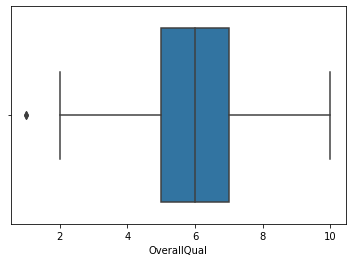

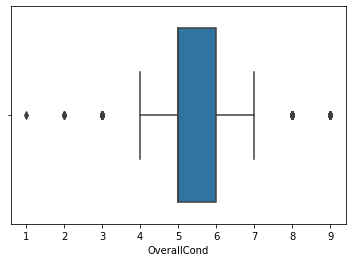

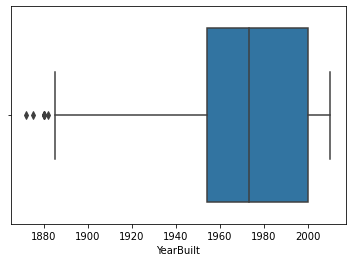

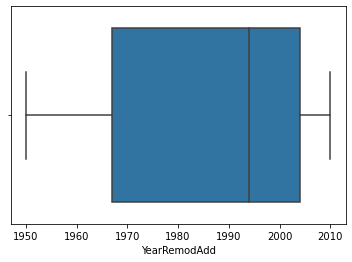

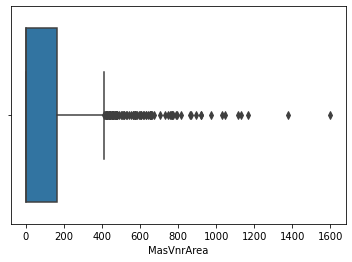

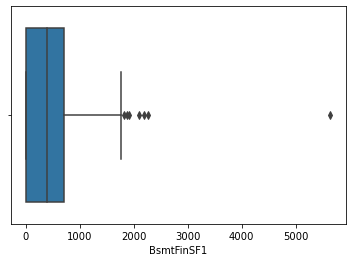

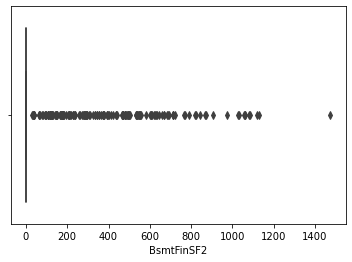

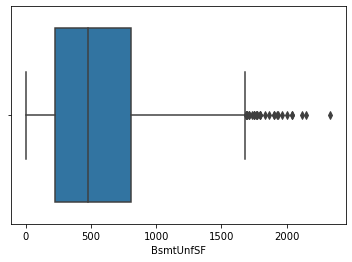

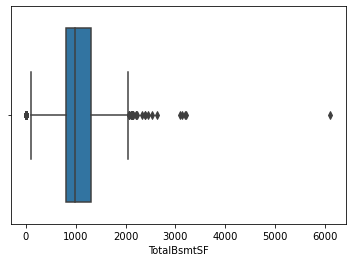

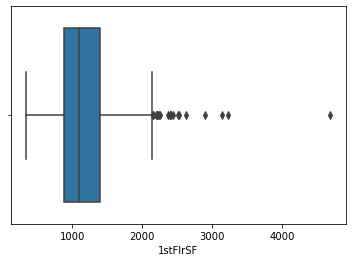

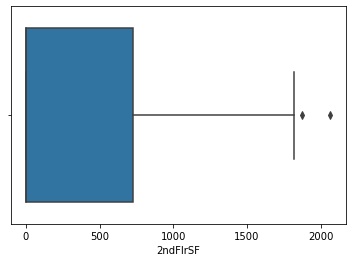

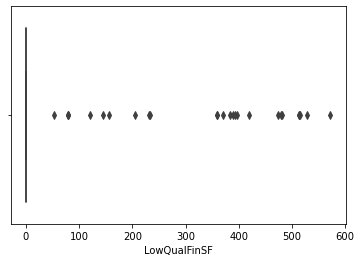

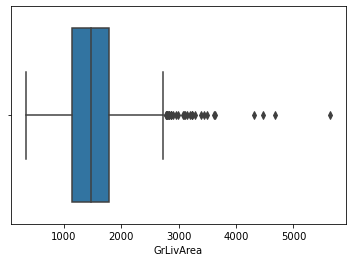

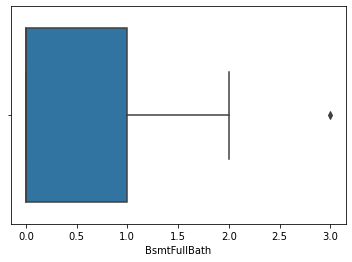

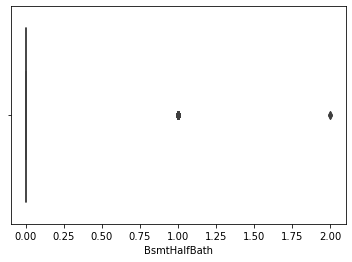

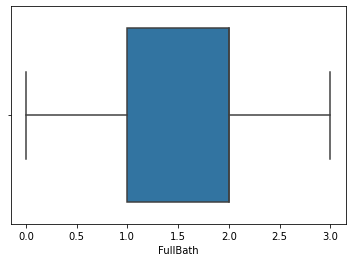

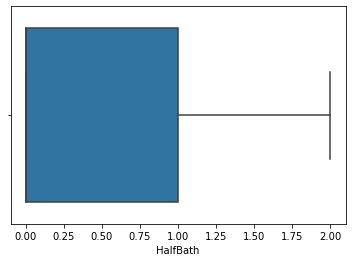

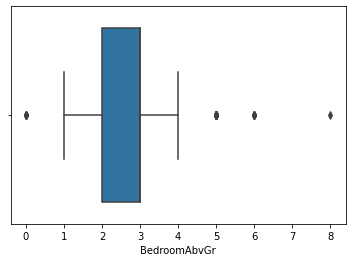

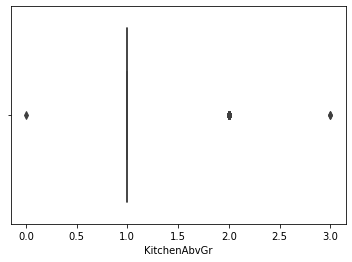

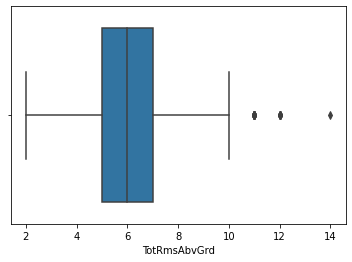

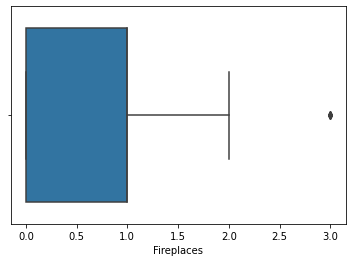

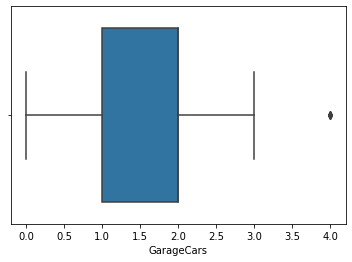

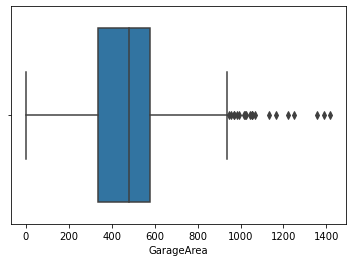

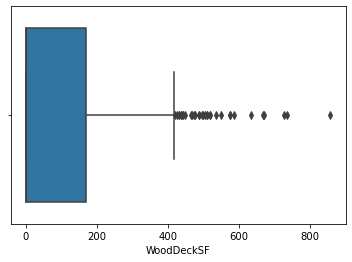

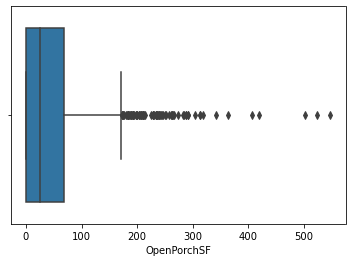

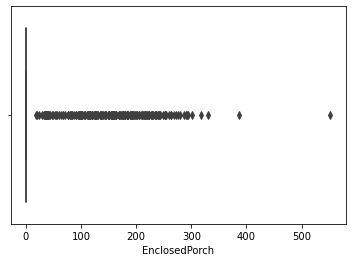

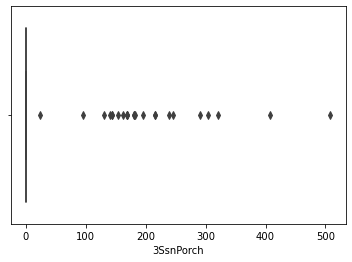

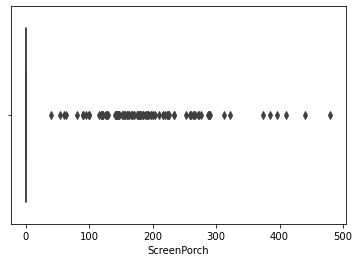

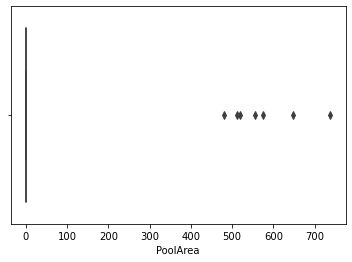

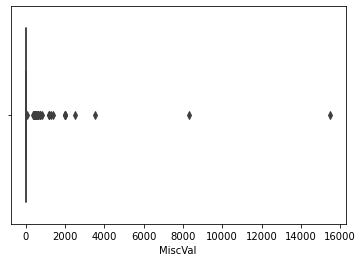

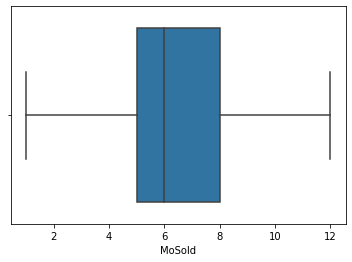

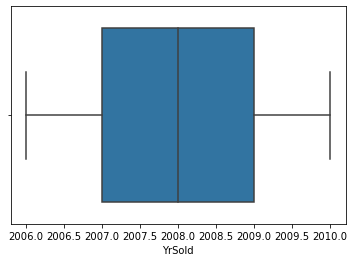

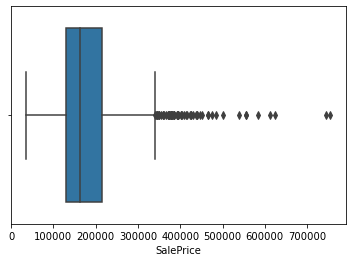

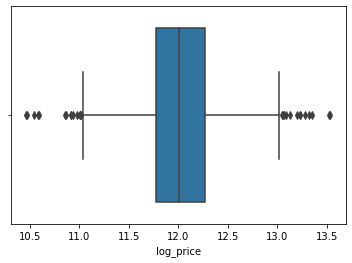

In [22]:
for num_var in numeric_data:
    sns.boxplot(house[num_var])
    plt.show()

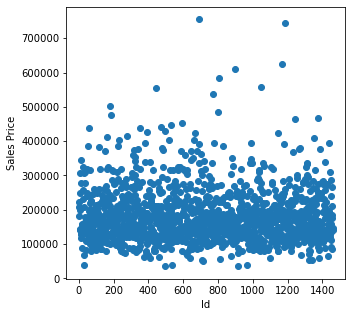

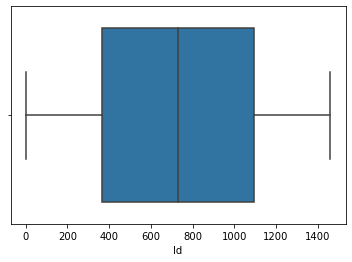

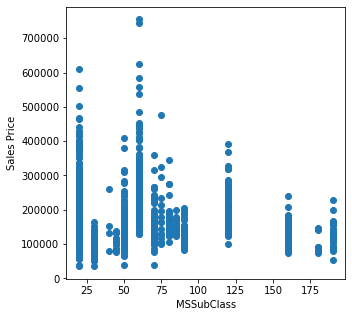

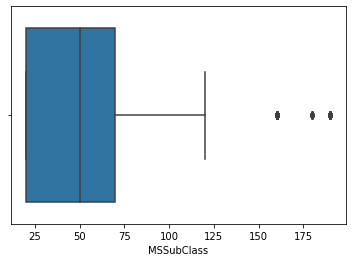

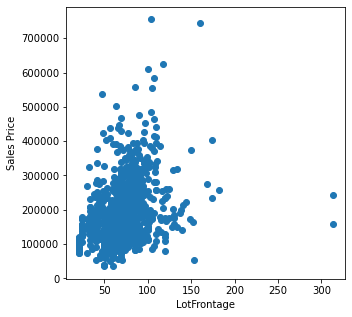

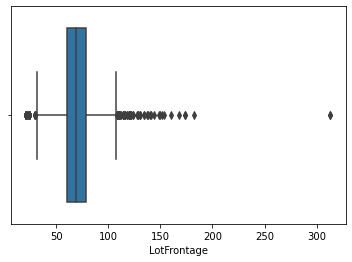

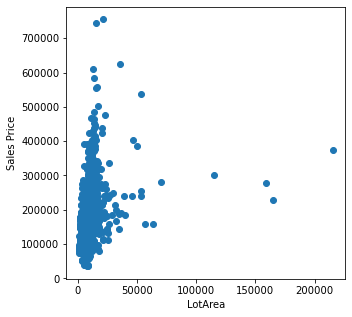

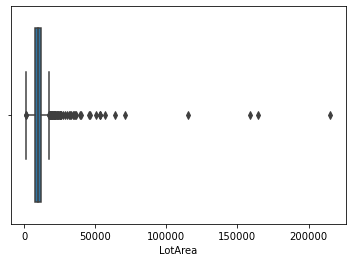

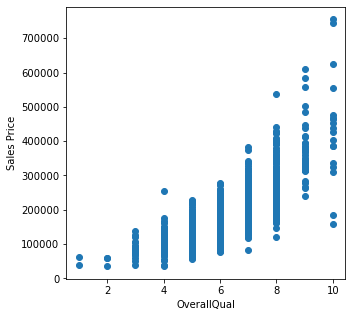

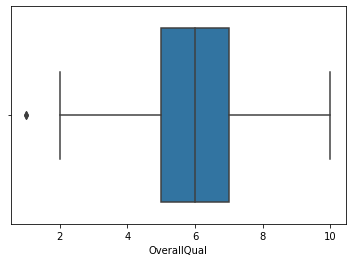

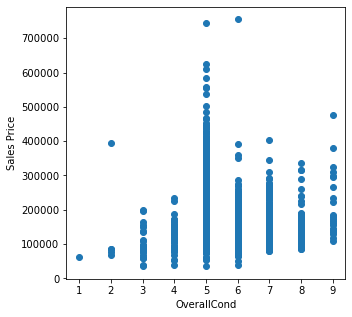

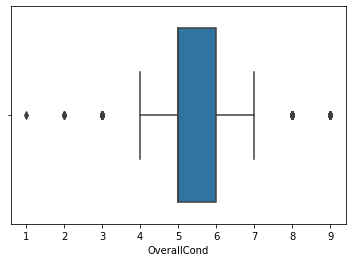

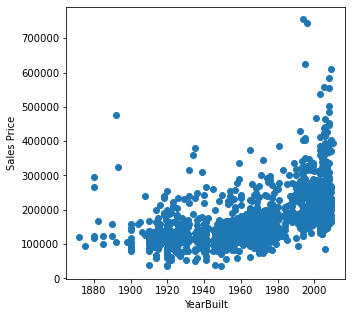

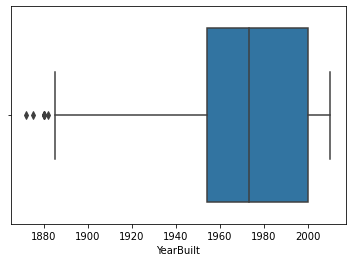

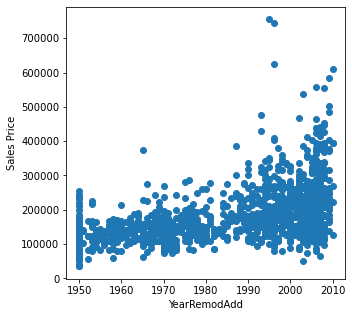

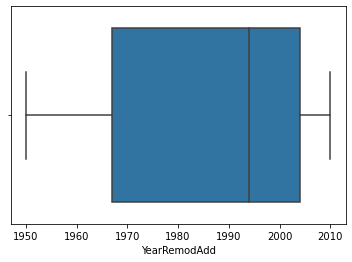

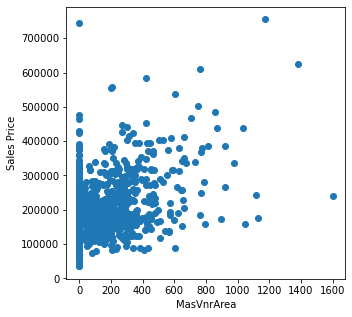

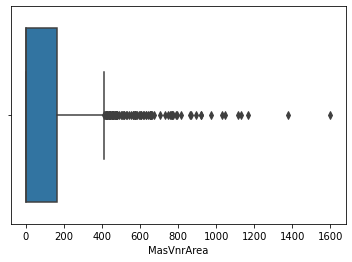

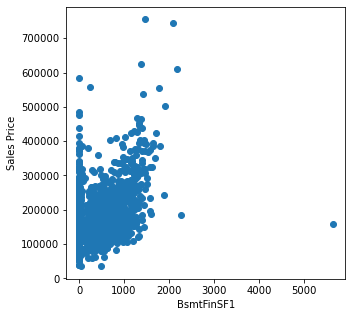

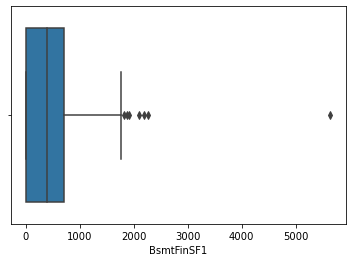

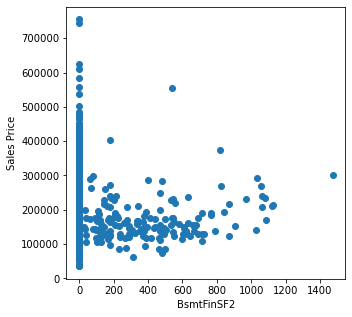

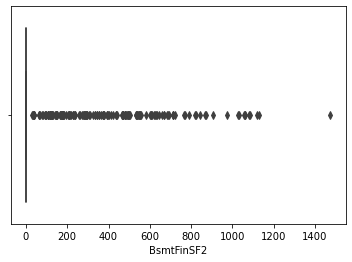

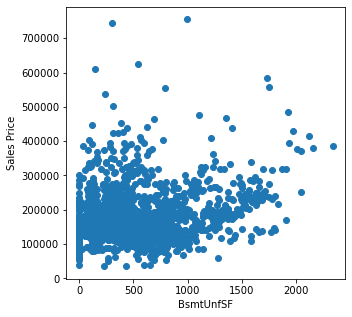

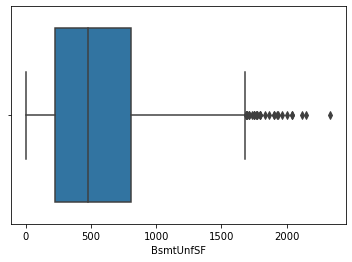

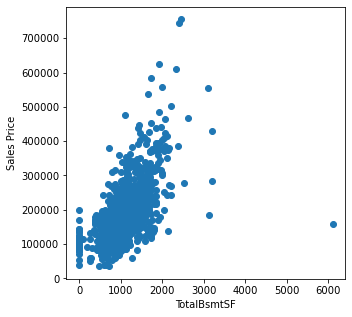

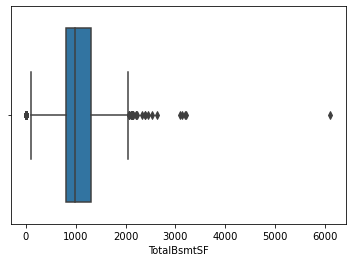

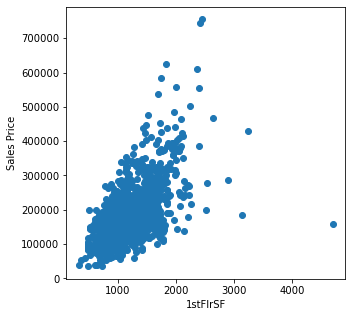

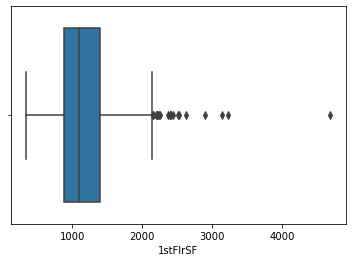

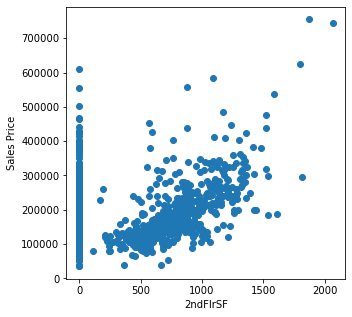

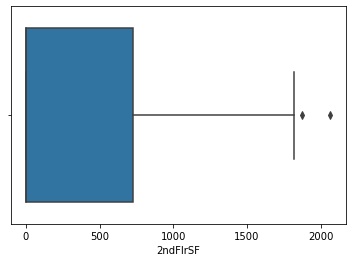

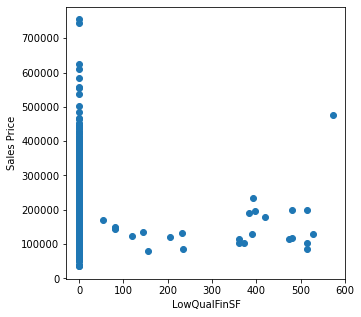

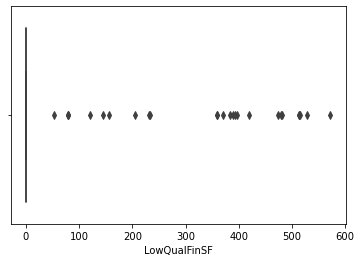

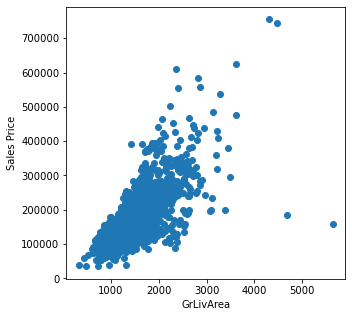

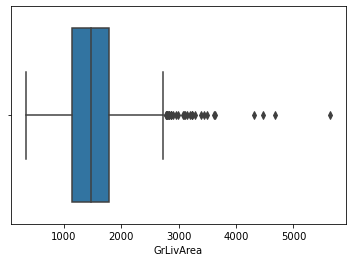

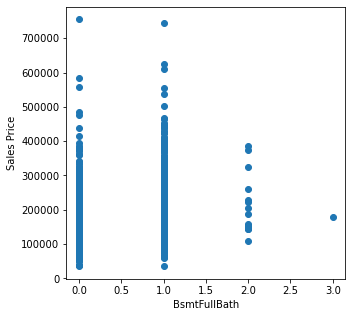

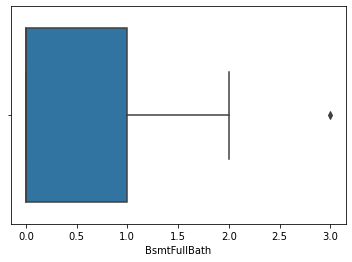

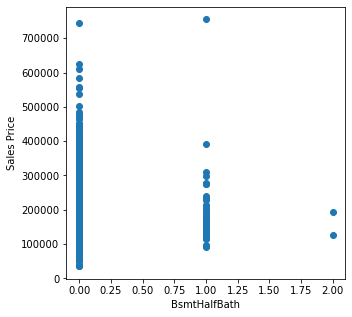

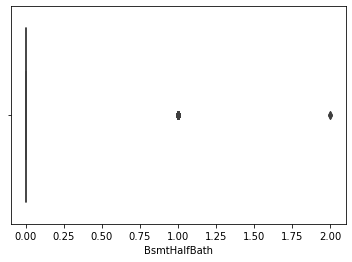

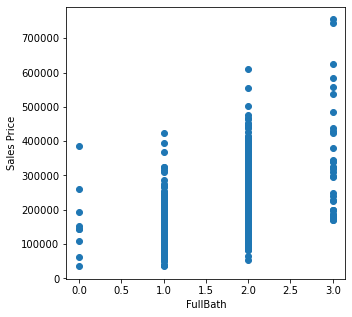

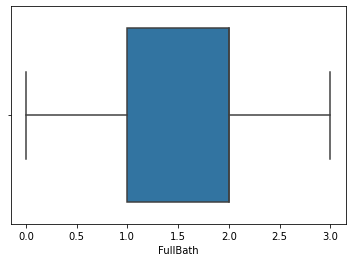

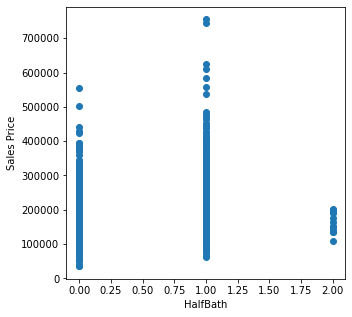

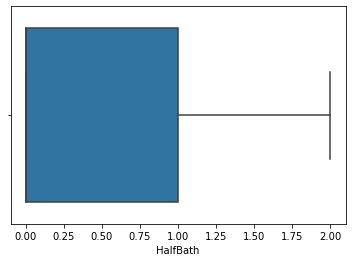

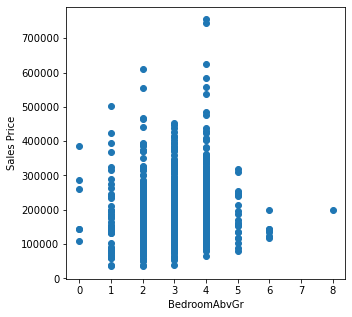

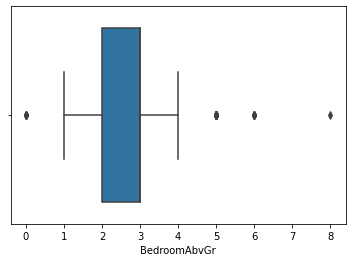

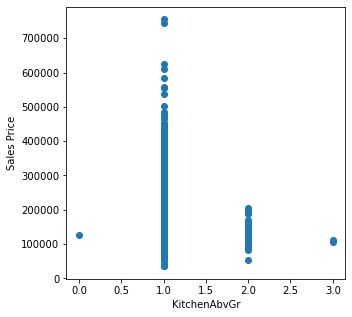

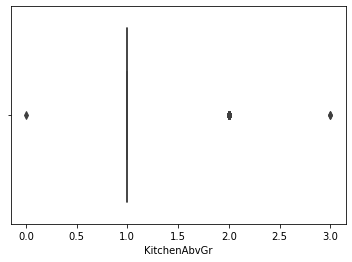

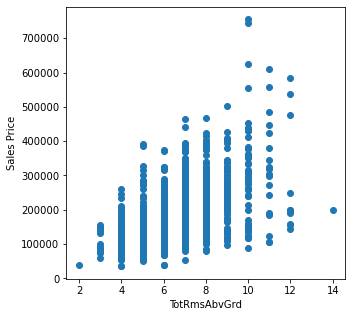

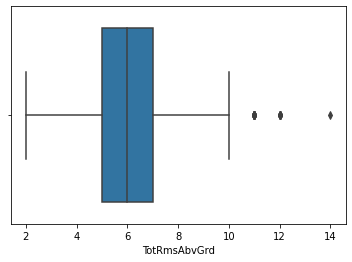

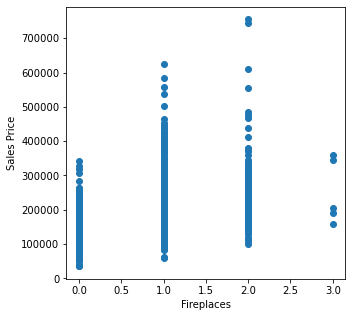

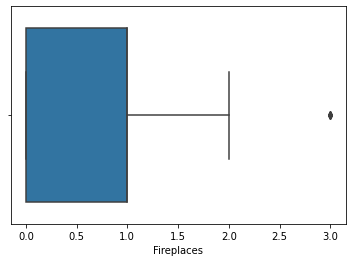

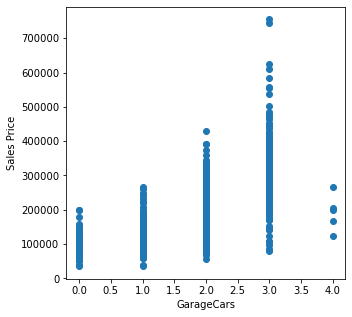

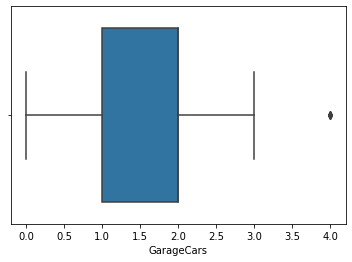

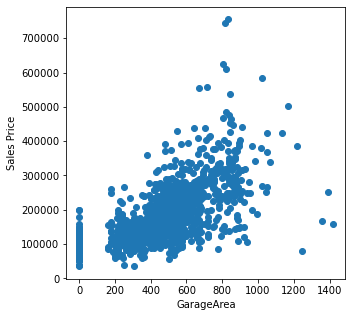

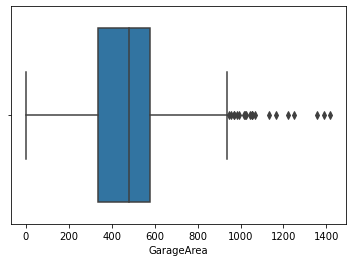

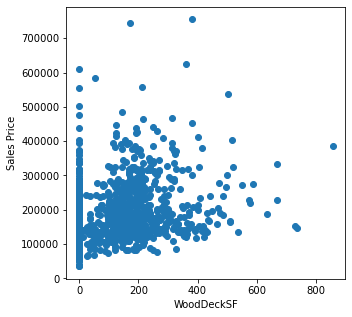

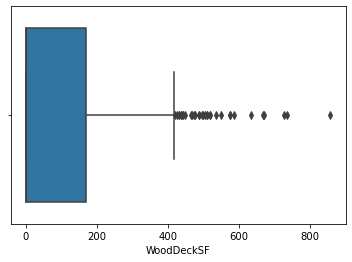

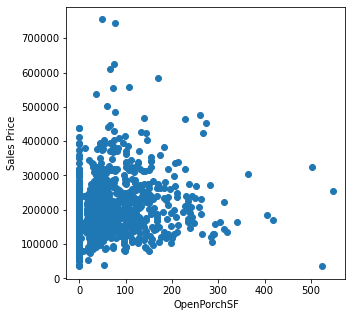

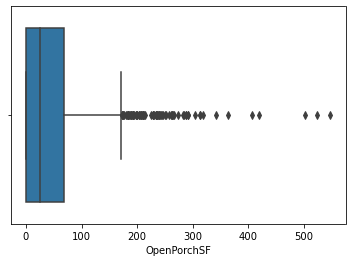

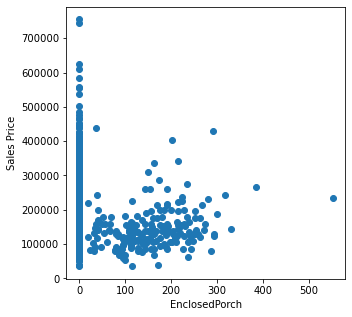

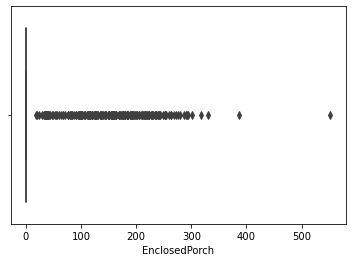

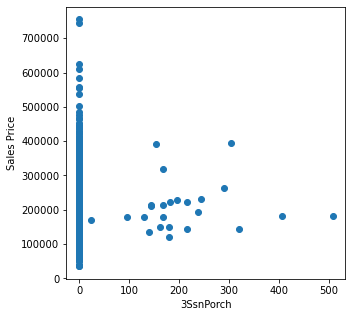

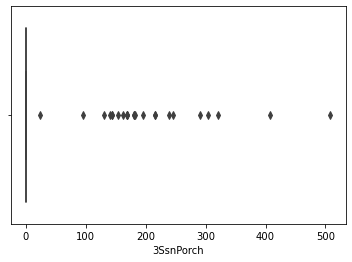

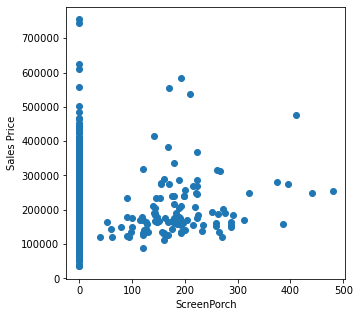

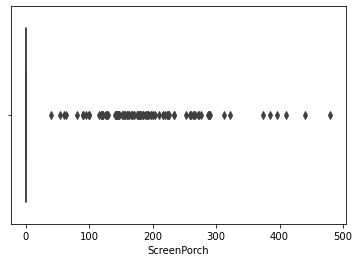

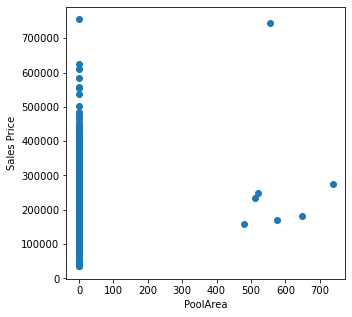

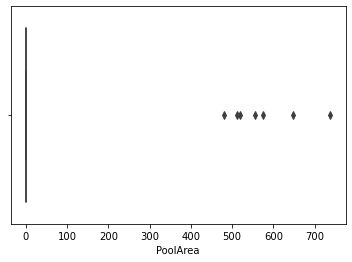

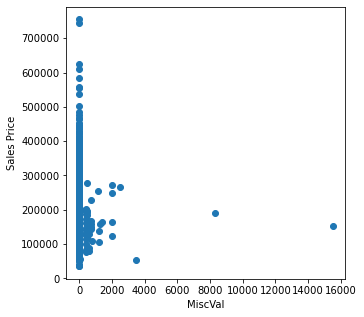

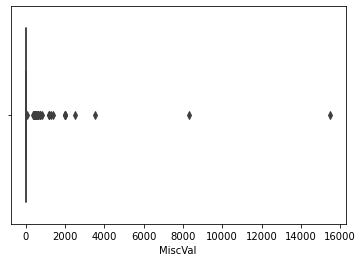

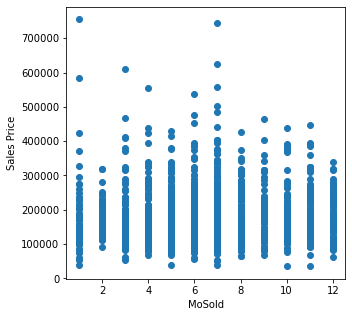

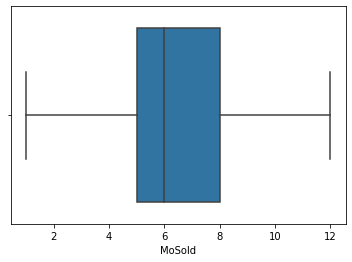

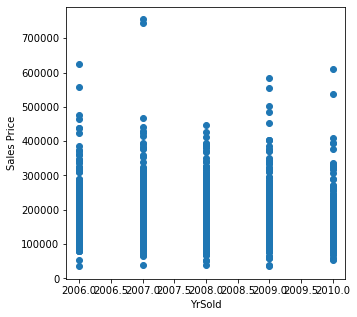

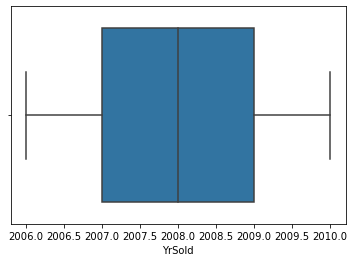

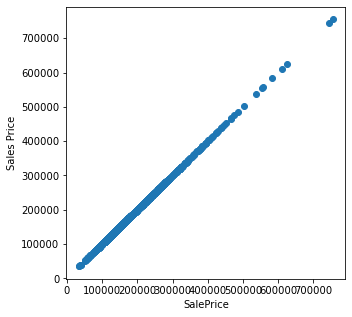

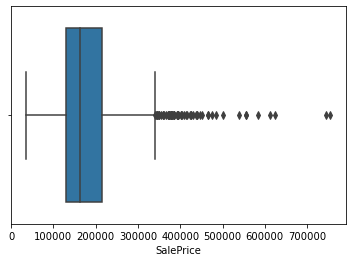

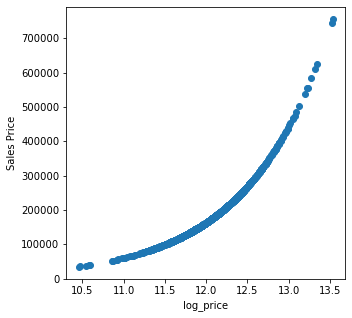

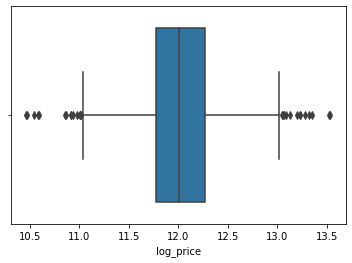

In [23]:
for num_var in numeric_data:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(house[num_var], house['SalePrice'])
    ax.set_xlabel(num_var)
    ax.set_ylabel('Sales Price')
    plt.show()
    
    sns.boxplot(house[num_var])
    
    

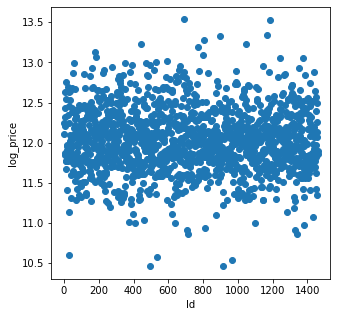

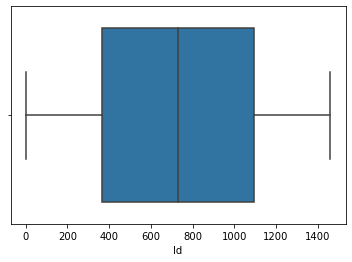

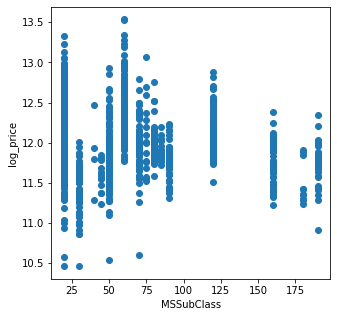

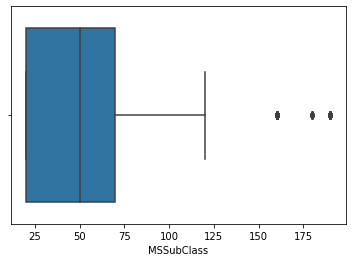

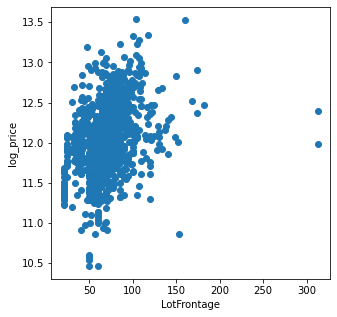

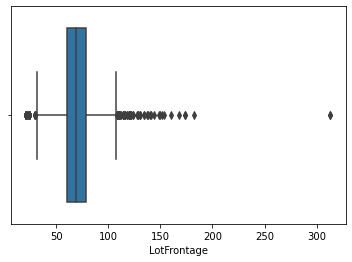

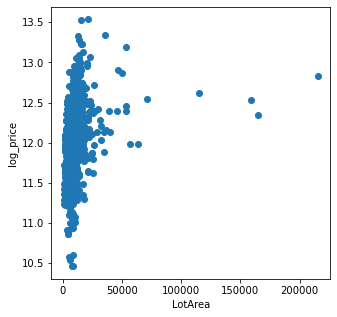

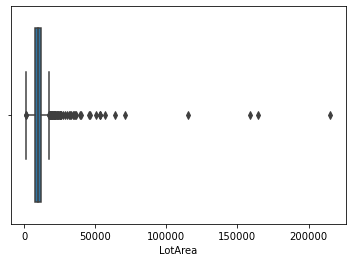

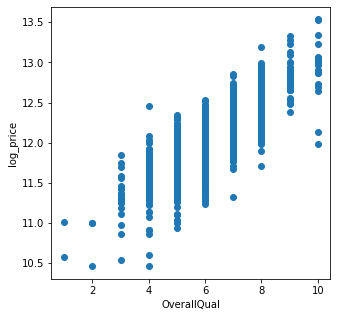

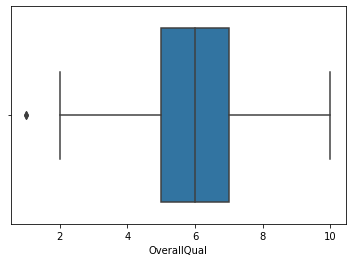

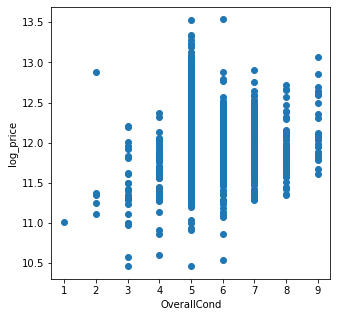

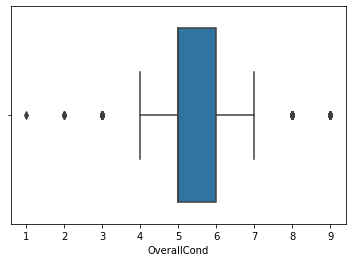

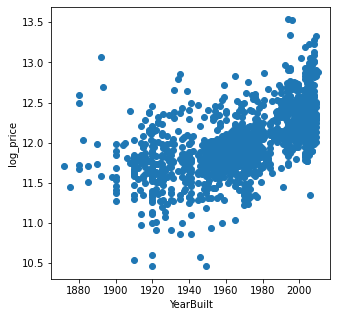

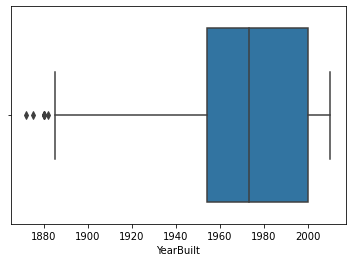

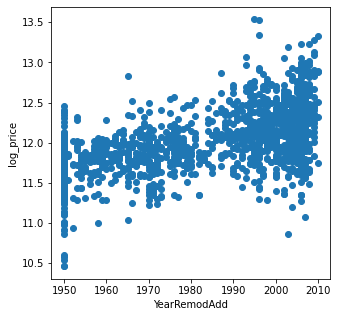

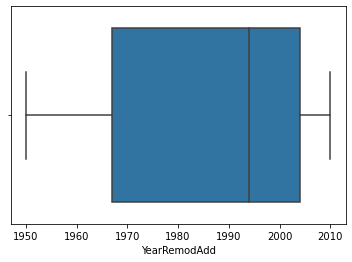

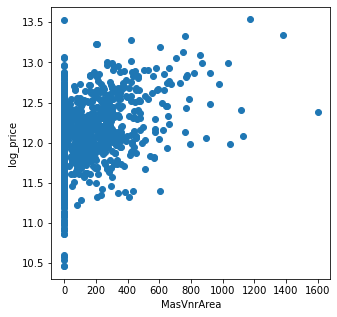

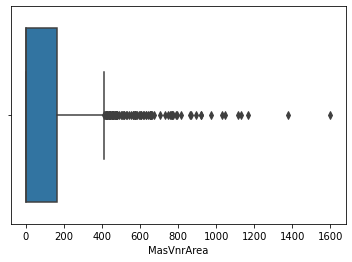

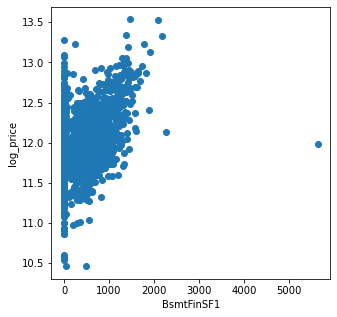

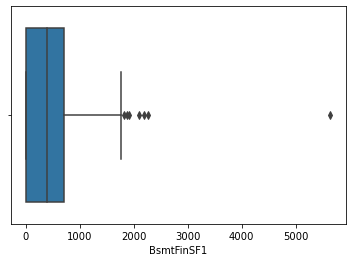

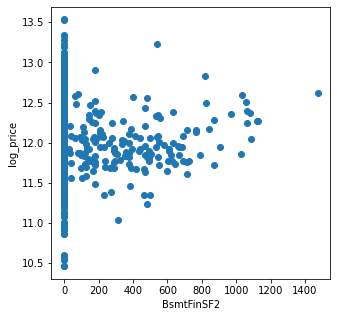

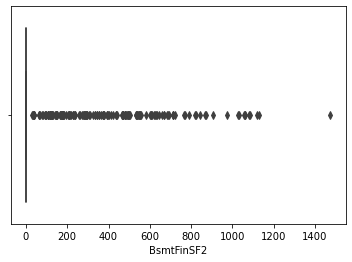

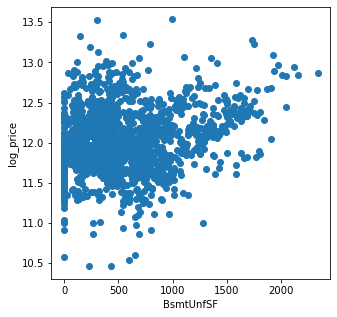

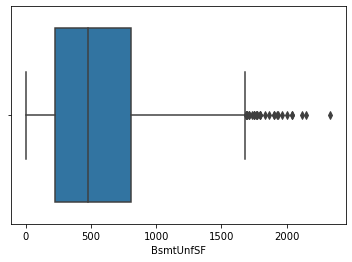

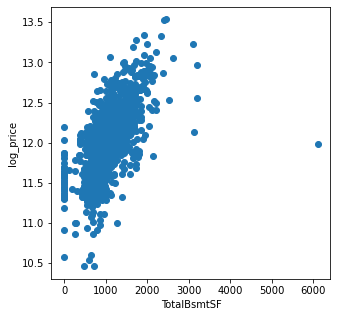

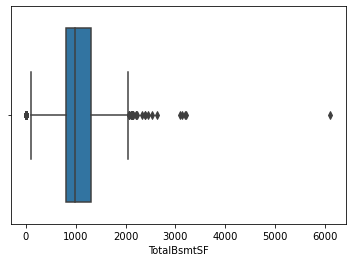

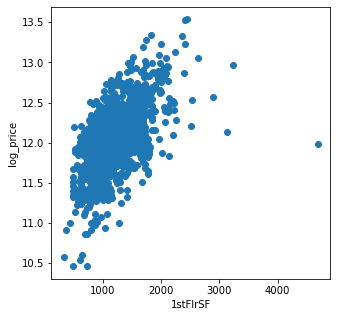

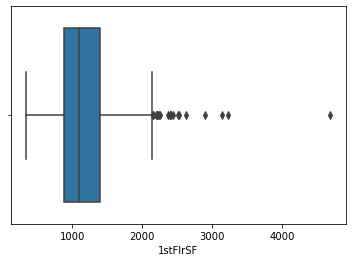

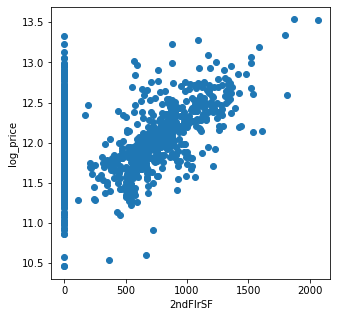

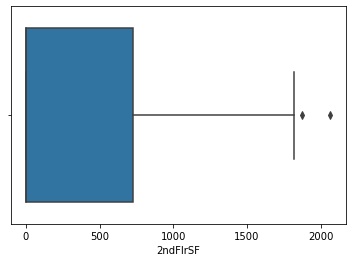

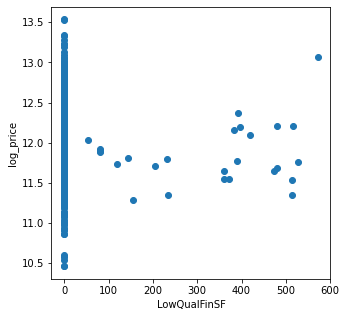

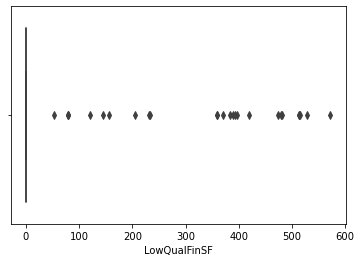

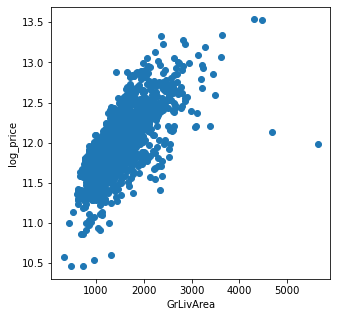

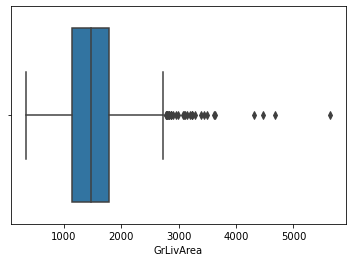

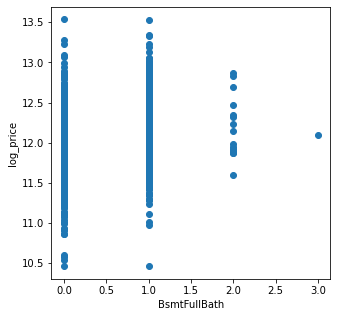

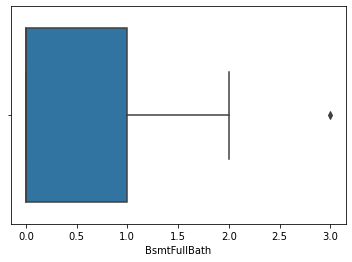

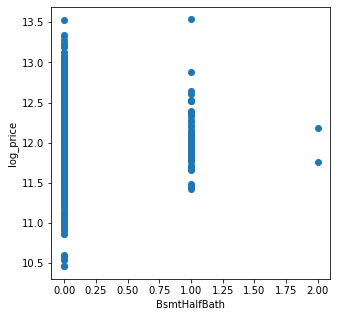

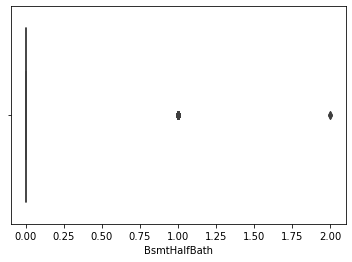

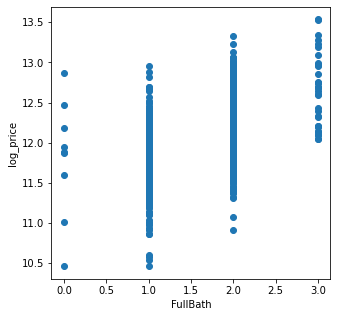

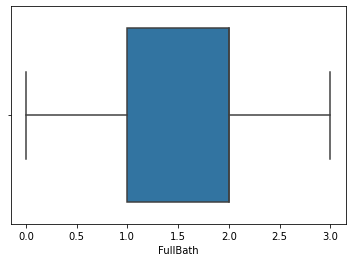

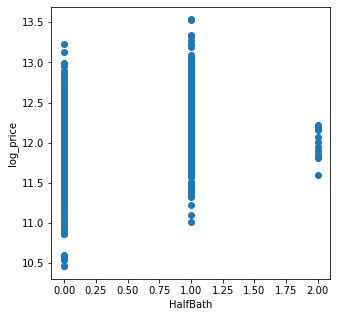

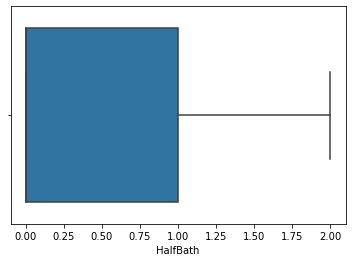

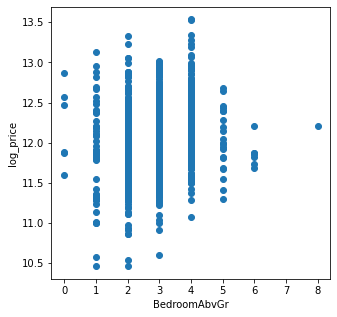

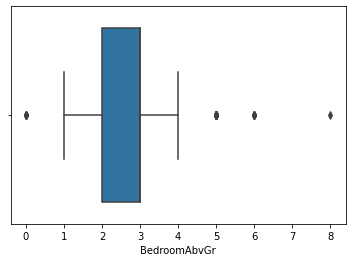

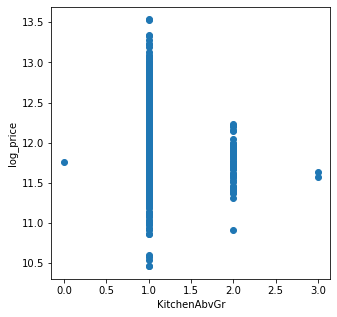

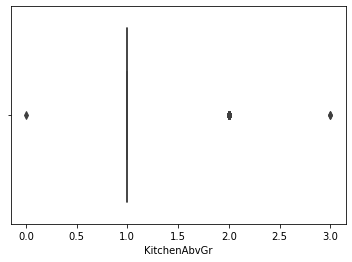

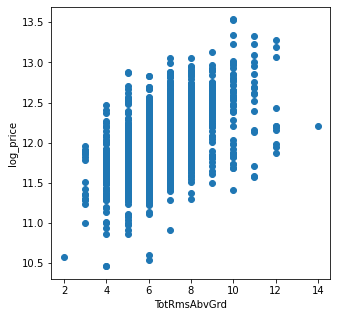

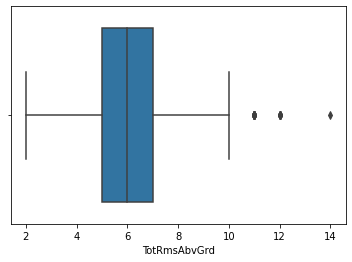

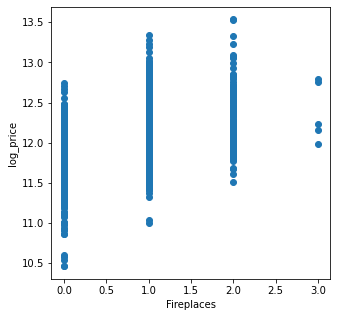

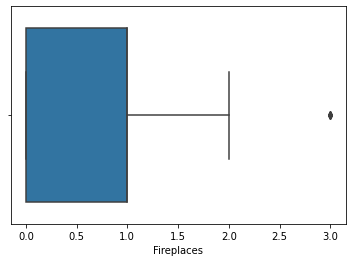

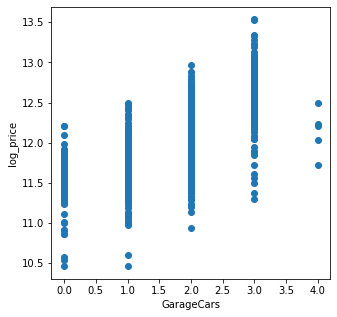

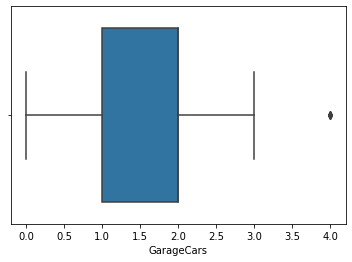

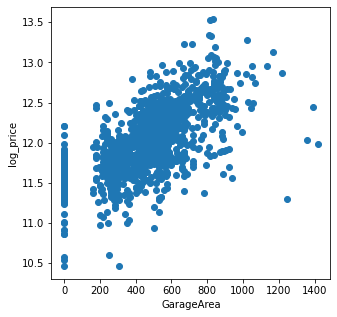

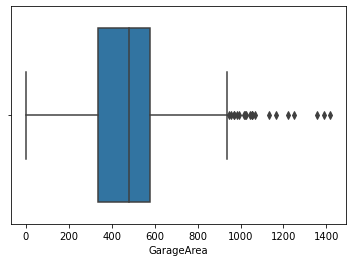

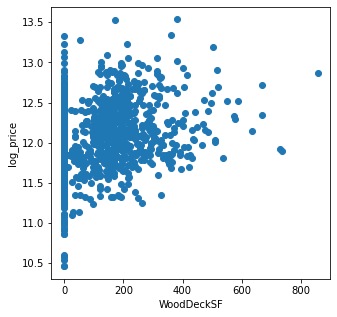

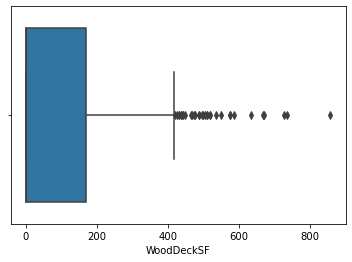

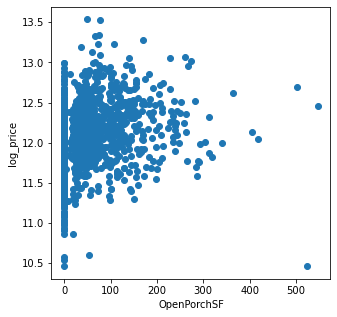

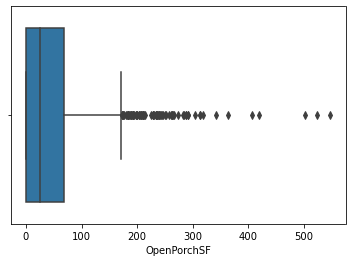

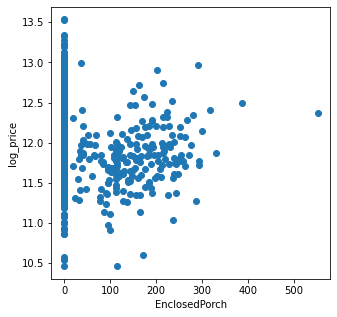

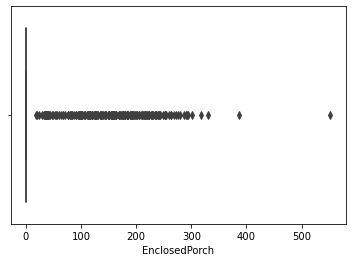

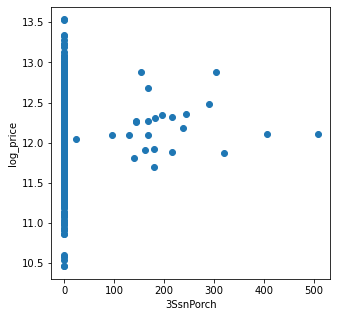

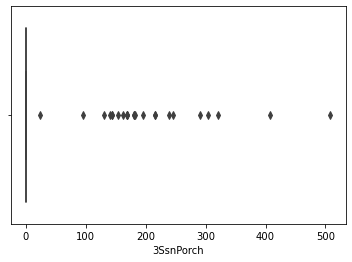

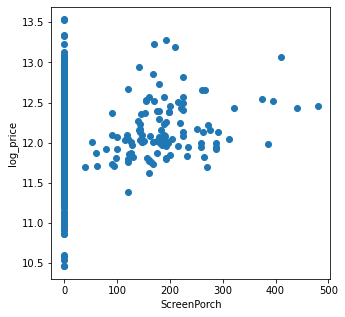

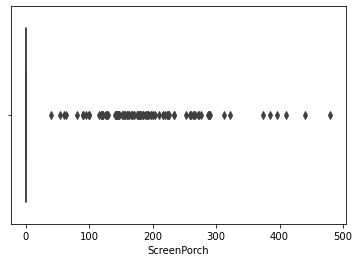

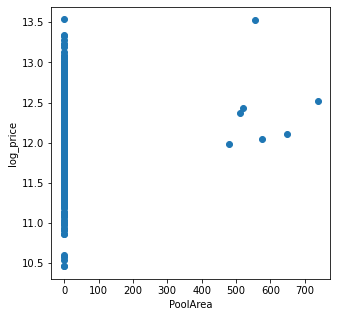

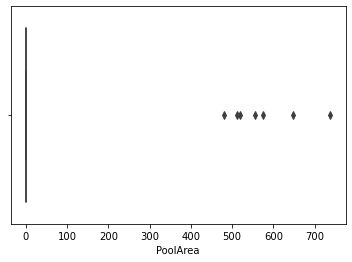

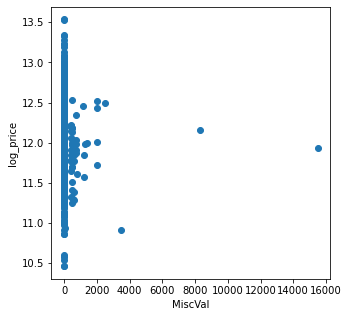

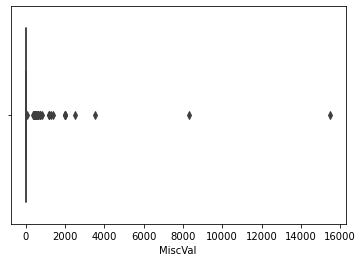

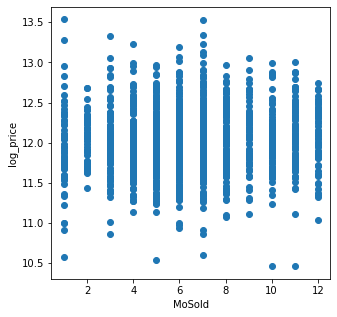

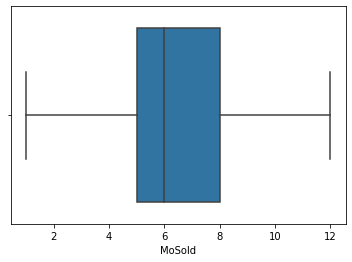

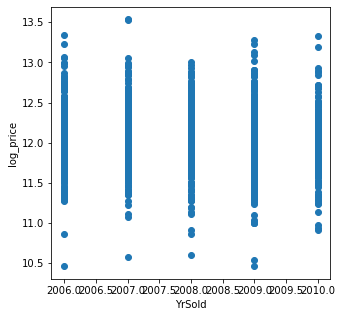

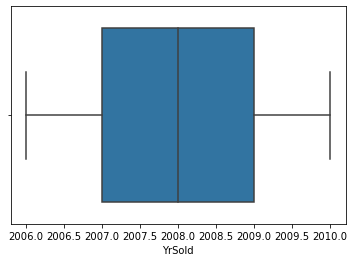

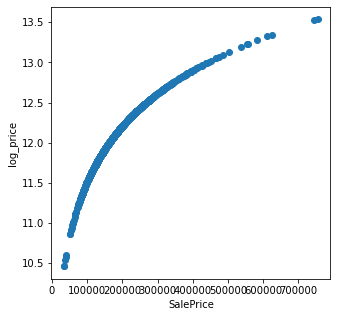

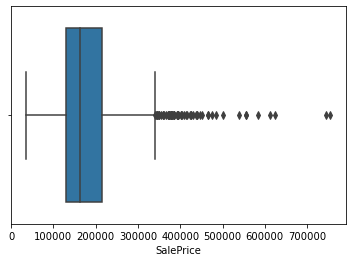

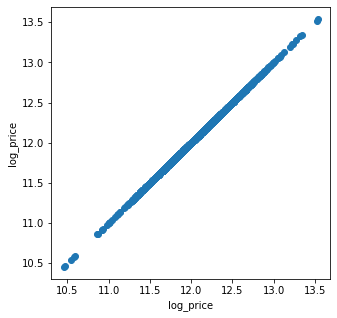

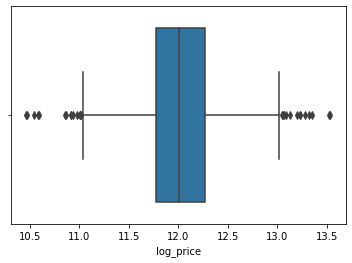

In [24]:
for num_var in numeric_data:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(house[num_var], house['log_price'])
    ax.set_xlabel(num_var)
    ax.set_ylabel('log_price')
    plt.show()
    
    sns.boxplot(house[num_var])
    
    

In [25]:
###processing the outliers with Median based on the EDA

house['WoodDeckSF'][house['WoodDeckSF']>800]=house['WoodDeckSF'].median()
house['LotFrontage'][house['LotFrontage']>200]=house['LotFrontage'].median()
house['LotArea'][house['LotArea']>100000]=house['LotArea'].median()
house['BsmtFinSF1'][house['BsmtFinSF1']>5000]=house['BsmtFinSF1'].median()
house['BsmtFinSF2'][house['BsmtFinSF2']>1400]=house['BsmtFinSF2'].median()
house['BsmtUnfSF'][house['BsmtUnfSF']>2100]=house['BsmtUnfSF'].median()
house['TotalBsmtSF'][house['TotalBsmtSF']>2100]=house['TotalBsmtSF'].median()
house['1stFlrSF'][house['1stFlrSF']>3000]=house['1stFlrSF'].median()
house['2ndFlrSF'][house['2ndFlrSF']>1800]=house['2ndFlrSF'].median()
house['LowQualFinSF'][house['LowQualFinSF']>550]=house['LowQualFinSF'].median()
house['GrLivArea'][house['GrLivArea']>4500]=house['GrLivArea'].median()
house['BsmtFullBath'][house['BsmtFullBath']>3.0]=house['BsmtFullBath'].median()
house['BsmtHalfBath'][house['BsmtHalfBath']>1.25]=house['BsmtHalfBath'].median()
house['BedroomAbvGr'][house['BedroomAbvGr']>4]=house['BedroomAbvGr'].median()
house['KitchenAbvGr'][house['KitchenAbvGr']>2.5]=house['KitchenAbvGr'].median()
house['KitchenAbvGr'][house['KitchenAbvGr']<1.0]=house['KitchenAbvGr'].median()
house['TotRmsAbvGrd'][house['TotRmsAbvGrd']>10]=house['TotRmsAbvGrd'].median()
house['Fireplaces'][house['Fireplaces']>1.5]=house['Fireplaces'].median()
house['GarageCars'][house['GarageCars']>3.0]=house['GarageCars'].median()
house['GarageArea'][house['GarageArea']>1300]=house['GarageArea'].median()
house['MiscVal'][house['MiscVal']>8000]=house['MiscVal'].median()
house['3SsnPorch'][house['3SsnPorch']>350]=house['3SsnPorch'].median()
house['EnclosedPorch'][house['EnclosedPorch']>400]=house['EnclosedPorch'].median()


In [26]:
#convert the below variables into Object, they are categorical variables represented in numerical data type
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')

#We have the following variables related to Year and convert them to reflect age 
YearBuilt
YearRemodAdd
GarageYrBlt
YrSold

In [27]:
house['YearBuilt']=2020-house['YearBuilt']
house['YearRemodAdd']=2020-house['YearRemodAdd']
house['YrSold']=2020-house['YrSold']

In [28]:
###Top 10 correlating Variables with Default=0
corr = house.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
1223,log_price,SalePrice,0.95,0.95
827,GarageArea,GarageCars,0.89,0.89
713,TotRmsAbvGrd,GrLivArea,0.74,0.74
359,1stFlrSF,TotalBsmtSF,0.73,0.73
1168,SalePrice,GrLivArea,0.73,0.73
1203,log_price,GrLivArea,0.73,0.73
1212,log_price,GarageCars,0.69,0.69
1213,log_price,GarageArea,0.66,0.66
496,BsmtFullBath,BsmtFinSF1,0.66,0.66
1177,SalePrice,GarageCars,0.65,0.65


### 3. Data Preparation

In [30]:
# split into X and y
X=house.drop(['SalePrice', 'log_price'], axis = 1) 
y =house['log_price']

In [31]:
# subset all categorical variables
house_category = X.select_dtypes(include=['object'])
house_category.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fire Pl,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Other_neighbor,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Other_neighbor,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal


In [32]:
# convert the categorical variables into dummies
house_dummies = pd.get_dummies(house_category, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other_neighbor,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_Other_Condition1,Condition1_PosA,Condition1_PosN,Condition2_Norm,Condition2_Other_Condition2,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other_Housestyle,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Other_RoofStyle,RoofMatl_Other_RoofMatl,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other_Exterior1st,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other_Exterior2nd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Other_ExterCond,ExterCond_TA,Foundation_CBlock,Foundation_Other_Found,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Bsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Bsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Pl,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other_GarageType,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_Other_GarageQual,GarageQual_TA,GarageCond_No Garage,GarageCond_Other_GarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_ConLD,SaleType_New,SaleType_Other_SaleType,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0

In [33]:
# drop categorical variables 
X = X.drop(list(house_category.columns), axis=1)

In [34]:
X=X.drop('Id',axis=1)

In [35]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [36]:
# Review the top correlated variables and remove them accordingly
###Top 10 correlating Variables with Default=0
corr = X.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(60)

,VAR1,VAR2,Correlation,Correlation_abs
31821,BsmtCond_No Bsmt,BsmtQual_No Bsmt,1.00,1.00
33144,BsmtExposure_No Bsmt,BsmtCond_No Bsmt,1.00,1.00
44634,GarageCond_No Garage,GarageType_No Garage,1.00,1.00
18741,BldgType_Duplex,MSSubClass_90,1.00,1.00
43976,GarageQual_No Garage,GarageFinish_No Garage,1.00,1.00
43974,GarageQual_No Garage,GarageType_No Garage,1.00,1.00
43314,GarageFinish_No Garage,GarageType_No Garage,1.00,1.00
44636,GarageCond_No Garage,GarageFinish_No Garage,1.00,1.00
33141,BsmtExposure_No Bsmt,BsmtQual_No Bsmt,1.00,1.00
44639,GarageCond_No Garage,GarageQual_No Garage,1.00,1.00


In [46]:
print(list(X.columns))

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighb

In [48]:
#Remove the variables that are highly correlated (80%)
columns_to_be_dropped=['FireplaceQu_No Fire Pl','BsmtFinType1_No Bsmt','GarageFinish_No Garage','GarageCond_No Garage','GarageType_No Garage',
                      'GarageQual_No Garage','BsmtExposure_No Bsmt','BsmtFinType2_No Bsmt','SaleCondition_Partial',
                       'Exterior2nd_VinylSd','Neighborhood_Somerst','MSZoning_RM','MasVnrType_None','HouseStyle_2Story',
                      'BldgType_Duplex','Heating_GasW','MSSubClass_90','HouseStyle_2Story','GarageCond_TA','BsmtCond_No Bsmt',
                      'BldgType_2fmCon','Exterior2nd_MetalSd','HouseStyle_SLvl','ExterQual_TA','GarageArea',
                      'ExterCond_TA','Exterior2nd_Wd Sdng','KitchenQual_TA','BsmtQual_No Bsmt','HouseStyle_1Story','BldgType_TwnhsE',
                      'Foundation_PConc','BsmtQual_TA','SaleType_WD','Exterior2nd_Plywood']
X=X.drop(columns_to_be_dropped,axis=1)

In [49]:
#review the top correlated variables and remove them accordingly
###Top 10 correlating Variables with Default=0
corr = X.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(60)

,VAR1,VAR2,Correlation,Correlation_abs
3546,TotRmsAbvGrd,GrLivArea,0.74,0.74
1682,1stFlrSF,TotalBsmtSF,0.73,0.73
25674,BsmtFinType2_Unf,BsmtFinSF2,-0.72,0.72
28024,Electrical_Mix,BsmtCond_Po,0.71,0.71
33284,Fence_No Fence,Fence_MnPrv,-0.71,0.71
6520,MSSubClass_60,2ndFlrSF,0.69,0.69
14585,Condition2_Other_Condition2,Condition2_Norm,-0.68,0.68
2423,BsmtFullBath,BsmtFinSF1,0.66,0.66
34590,SaleCondition_Normal,SaleType_New,-0.65,0.65
24743,BsmtFinType1_Unf,BsmtFinSF1,-0.65,0.65


#### 4. Model Building

In [50]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols


In [51]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [52]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031640,0.040938,0.005862,0.000983,0.0001,{'alpha': 0.0001},-0.090810,-0.082164,-0.090158,-0.088009,-0.080717,-0.086371,0.004157,26,-0.061919,-0.060792,-0.060875,-0.061076,-0.063285,-0.061590,0.000937
1,0.014372,0.000825,0.007009,0.001983,0.001,{'alpha': 0.001},-0.090810,-0.082164,-0.090158,-0.088008,-0.080717,-0.086371,0.004157,25,-0.061919,-0.060792,-0.060875,-0.061076,-0.063285,-0.061590,0.000937
2,0.022532,0.003947,0.011230,0.002257,0.01,{'alpha': 0.01},-0.090807,-0.082164,-0.090156,-0.088007,-0.080715,-0.086370,0.004156,24,-0.061919,-0.060792,-0.060875,-0.061076,-0.063285,-0.061589,0.000938
3,0.023091,0.007967,0.012768,0.003806,0.05,{'alpha': 0.05},-0.090795,-0.082164,-0.090151,-0.087999,-0.080706,-0.086363,0.004155,23,-0.061918,-0.060792,-0.060873,-0.061075,-0.063285,-0.061588,0.000938
4,0.019479,0.001081,0.009713,0.001164,0.1,{'alpha': 0.1},-0.090781,-0.082165,-0.090144,-0.087989,-0.080695,-0.086355,0.004152,22,-0.061916,-0.060792,-0.060871,-0.061073,-0.063284,-0.061587,0.000938


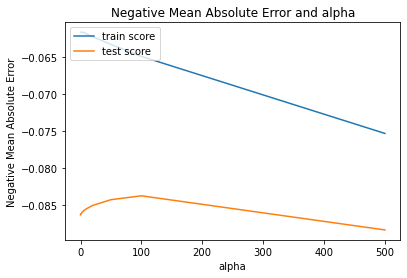

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.57733546e-02,  1.15685830e-02, -3.22310309e-02, -2.61949140e-02,
        6.66983297e-03,  3.65042538e-02,  1.10593169e-02,  1.17698870e-02,
        2.42043701e-02,  4.06998717e-02,  1.89571238e-02, -2.86145031e-03,
        7.89501585e-02,  1.42154235e-02,  6.95296322e-06,  2.07986589e-02,
        1.25872197e-02, -9.93783648e-04, -1.95000389e-02,  1.31182624e-02,
        1.40209206e-02,  2.65026026e-02,  1.06363287e-02,  5.05584933e-03,
        3.91759047e-03,  1.82334236e-03,  9.17267607e-03, -1.99636932e-03,
       -1.31421728e-04, -4.34928120e-04,  2.11362277e-03, -1.83081860e-02,
       -1.02912197e-04,  9.99880623e-04,  3.17386253e-03,  4.16766548e-03,
        1.07827883e-02,  1.20166327e-03, -1.61272711e-03,  2.37834539e-04,
       -1.97454335e-03, -7.26463489e-03, -8.77607375e-03, -1.24310833e-03,
        2.20759437e-02,  9.77656774e-03,  2.17809376e-02,  4.88325260e-03,
        2.39422625e-03, -2.19482996e-03,  1.10637445e-03,  2.02937229e-03,
        2.45322397e-03,  

In [63]:
# lasso
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [57]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144692,0.022562,0.008594,0.001820,0.0001,{'alpha': 0.0001},-0.089320,-0.081560,-0.089313,-0.087316,-0.079804,-0.085463,0.004010,9,-0.061869,-0.060810,-0.060816,-0.060989,-0.063248,-0.061546,0.000937
1,0.035041,0.004695,0.007497,0.000617,0.001,{'alpha': 0.001},-0.083209,-0.080501,-0.086448,-0.084253,-0.078929,-0.082668,0.002675,6,-0.063320,-0.062936,-0.061996,-0.062816,-0.064590,-0.063132,0.000847
2,0.026307,0.002853,0.006429,0.001666,0.002,{'alpha': 0.002},-0.078928,-0.082070,-0.085147,-0.082047,-0.077906,-0.081220,0.002572,2,-0.065459,-0.065390,-0.064200,-0.064573,-0.066811,-0.065287,0.000901
3,0.024543,0.003283,0.007547,0.001060,0.003,{'alpha': 0.003},-0.077128,-0.082803,-0.085725,-0.081786,-0.078499,-0.081188,0.003074,1,-0.067421,-0.067085,-0.066845,-0.066490,-0.068858,-0.067340,0.000818
4,0.024738,0.002437,0.007339,0.000689,0.004,{'alpha': 0.004},-0.076714,-0.083576,-0.086318,-0.081656,-0.079014,-0.081456,0.003365,3,-0.069220,-0.068653,-0.068929,-0.068160,-0.070211,-0.069035,0.000684


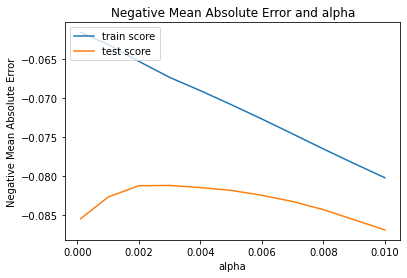

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
alpha =0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.01020575e-02,  1.06336528e-02, -5.60711059e-02, -2.66343549e-02,
        8.24416058e-04,  3.49129063e-02,  5.68959158e-03,  0.00000000e+00,
        3.35753696e-02,  1.45378543e-02, -0.00000000e+00, -7.54812343e-03,
        1.49715187e-01,  1.20024401e-02,  0.00000000e+00,  4.46977701e-03,
        5.19999076e-04, -0.00000000e+00, -2.18897367e-02,  2.69462530e-03,
        1.35771988e-02,  2.72988213e-02,  5.88454755e-03,  3.59201500e-04,
        1.16246808e-03,  0.00000000e+00,  5.78221553e-03, -3.52391592e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.36453426e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.03177642e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -7.69694781e-03, -6.01097909e-03, -0.00000000e+00,
        2.50320371e-02,  6.38974886e-03,  2.24884598e-02,  1.65052196e-03,
        7.93240323e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [61]:
#Results Model 1 : 
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train,y_train)
Lasso_test_score = lasso.score(X_test, y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))

Ridge_train_score 0.9459220032664134
Ridge_test_score 0.8828146426193432
Adjusted_R2_score_Ridge_Train 0.933861442843815
Adjusted_R2_score_Ridge_Test 0.8566797787430815
Lasso_train_score 0.9415395635807177
Lasso_test_score 0.8887042510018868
Adjusted_R2_score_Lasso_Train 0.9285016245231799
Adjusted_R2_score_Lasso_Test 0.8638828969087824


###### Model 2 : Features based on RFE

In [64]:
#Using RFE to select top 25 variables and run the model and evaluate the results
from sklearn.feature_selection import RFE
rfe = RFE(estimator=Ridge(), n_features_to_select=25)    
rfe = rfe.fit(X_train, y_train)
results = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns.values))#print("Features sorted by their rank:")
#print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

In [65]:
results

[(1, 'BsmtExposure_Gd'),
 (1, 'BsmtFinSF1'),
 (1, 'Condition2_PosN'),
 (1, 'FireplaceQu_Gd'),
 (1, 'GarageCars'),
 (1, 'GrLivArea'),
 (1, 'MSSubClass_160'),
 (1, 'MSZoning_FV'),
 (1, 'MSZoning_RL'),
 (1, 'OverallCond_3'),
 (1, 'OverallCond_6'),
 (1, 'OverallCond_7'),
 (1, 'OverallCond_8'),
 (1, 'OverallCond_9'),
 (1, 'OverallQual_10'),
 (1, 'OverallQual_5'),
 (1, 'OverallQual_6'),
 (1, 'OverallQual_7'),
 (1, 'OverallQual_8'),
 (1, 'OverallQual_9'),
 (1, 'SaleCondition_Normal'),
 (1, 'SaleType_New'),
 (1, 'TotalBsmtSF'),
 (1, 'YearBuilt'),
 (1, 'YearRemodAdd'),
 (2, 'KitchenAbvGr'),
 (3, 'MSSubClass_30'),
 (4, 'Condition1_Norm'),
 (5, 'Functional_Typ'),
 (6, 'LotArea'),
 (7, 'OverallQual_2'),
 (8, 'BsmtUnfSF'),
 (9, 'BsmtFinSF2'),
 (10, 'ExterQual_Fa'),
 (11, 'Neighborhood_Edwards'),
 (12, 'Neighborhood_NAmes'),
 (13, 'Neighborhood_Sawyer'),
 (14, 'Neighborhood_NWAmes'),
 (15, 'Neighborhood_Other_neighbor'),
 (16, 'Neighborhood_OldTown'),
 (17, 'FireplaceQu_TA'),
 (18, 'Neighborhood_Col

In [73]:
#run the ridge and lasso regression models with features selected using RFE
base_col=['BsmtExposure_Gd','BsmtFinSF1','Condition2_PosN','FireplaceQu_Gd','GarageCars','GrLivArea','MSSubClass_160','MSZoning_FV','MSZoning_RL',
          'OverallCond_3','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9', 'OverallQual_10',
          'OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','SaleCondition_Normal',
          'SaleType_New','TotalBsmtSF','YearBuilt','YearRemodAdd']

In [76]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[base_col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010016,0.012320,0.002653,0.001296,0.0001,{'alpha': 0.0001},-0.082039,-0.090566,-0.095461,-0.080965,-0.086102,-0.087027,0.005406,24,-0.085321,-0.082801,-0.082357,-0.084755,-0.083740,-0.083795,0.001124
1,0.005421,0.000381,0.002890,0.000469,0.001,{'alpha': 0.001},-0.082039,-0.090566,-0.095461,-0.080965,-0.086102,-0.087027,0.005406,23,-0.085321,-0.082801,-0.082357,-0.084755,-0.083740,-0.083795,0.001124
2,0.005660,0.001321,0.003600,0.000490,0.01,{'alpha': 0.01},-0.082038,-0.090566,-0.095460,-0.080965,-0.086102,-0.087026,0.005406,22,-0.085321,-0.082800,-0.082356,-0.084755,-0.083739,-0.083794,0.001123
3,0.007483,0.001413,0.004440,0.001042,0.05,{'alpha': 0.05},-0.082034,-0.090566,-0.095456,-0.080963,-0.086105,-0.087025,0.005406,21,-0.085320,-0.082799,-0.082355,-0.084753,-0.083738,-0.083793,0.001123
4,0.008528,0.000987,0.006315,0.001402,0.1,{'alpha': 0.1},-0.082030,-0.090566,-0.095450,-0.080962,-0.086108,-0.087023,0.005405,20,-0.085318,-0.082797,-0.082354,-0.084752,-0.083736,-0.083791,0.001123


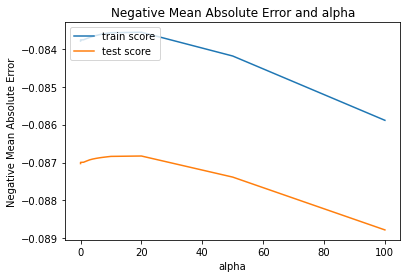

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.48671614e-02,  1.40535612e-02, -5.48934618e-02, -2.48427206e-02,
        4.34316166e-03,  4.59499385e-02,  1.71213032e-02,  1.91277226e-02,
        1.67789410e-02,  2.64558762e-02,  1.21196720e-02, -4.68091626e-03,
        1.15075752e-01,  1.47951580e-02,  1.10956571e-04,  1.51925270e-02,
        7.51124915e-03, -3.14880706e-03, -2.20645869e-02,  7.88595934e-03,
        9.38893963e-03,  2.41446797e-02,  9.84642985e-03,  4.20553024e-03,
        5.85337496e-03,  1.90557837e-03,  9.61583166e-03, -3.64964150e-03,
        1.36416908e-03, -3.10814080e-04,  2.13952710e-03, -1.56163212e-02,
       -6.78669272e-04,  2.26236028e-03,  3.00341182e-03, -2.61541212e-03,
        1.08839593e-02,  1.41144247e-03, -1.13214045e-03,  9.89625400e-04,
       -1.00666471e-03, -1.02941028e-02, -8.07169576e-03, -5.29715962e-04,
        2.14827651e-02,  1.19482652e-02,  2.78602255e-02,  5.18299223e-03,
        2.34794693e-03, -1.29897842e-03,  3.54960508e-03,  1.39786839e-03,
        2.13579957e-03,  

In [80]:
# list of alphas to tune
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [81]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train[base_col], y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003520,0.001355,0.001949,0.000495,0.0001,{'alpha': 0.0001},-0.081934,-0.090540,-0.095312,-0.080919,-0.086202,-0.086982,0.005383,2,-0.085281,-0.082729,-0.082312,-0.084714,-0.083676,-0.083742,0.001130
1,0.002851,0.000936,0.001446,0.000474,0.001,{'alpha': 0.001},-0.081274,-0.090400,-0.094311,-0.080923,-0.087357,-0.086853,0.005191,1,-0.085118,-0.082314,-0.082143,-0.084455,-0.083453,-0.083497,0.001165
2,0.002287,0.000366,0.001571,0.000726,0.002,{'alpha': 0.002},-0.081232,-0.090506,-0.093466,-0.081366,-0.089051,-0.087124,0.004965,3,-0.085450,-0.082343,-0.082462,-0.084562,-0.083618,-0.083687,0.001199
3,0.002470,0.000438,0.001203,0.000398,0.003,{'alpha': 0.003},-0.081680,-0.091005,-0.093172,-0.082268,-0.090266,-0.087678,0.004758,4,-0.086162,-0.082853,-0.083376,-0.085160,-0.083912,-0.084293,0.001209
4,0.002960,0.000847,0.001449,0.000458,0.004,{'alpha': 0.004},-0.081864,-0.091606,-0.092991,-0.083359,-0.090730,-0.088110,0.004571,5,-0.086678,-0.083806,-0.084094,-0.086081,-0.084310,-0.084994,0.001158


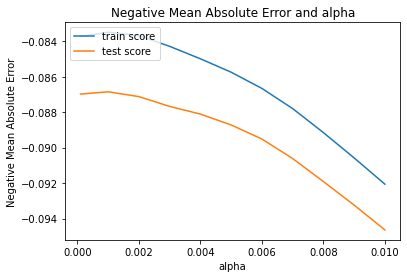

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Optimal alpha for Ridge : 20


#### Optimal alpha for Lasso :0.001

In [84]:
#Fit the model with optimal alpha for both ridge and Lasso regressions.
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[base_col], y_train)
ridge.coef_

array([ 0.02173126,  0.05008568, -0.02428675,  0.02477296,  0.04295322,
        0.15351069, -0.02078573,  0.03247438,  0.03746811, -0.02771257,
        0.02456624,  0.04051007,  0.02774558,  0.0230891 ,  0.04178271,
        0.02311471,  0.04202661,  0.07451866,  0.08033257,  0.064076  ,
        0.02680788,  0.02907869,  0.04609535, -0.08029806, -0.02891248])

In [85]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[base_col], y_train) 
lasso.coef_

array([ 0.02111178,  0.0500839 , -0.0230956 ,  0.02407159,  0.04135148,
        0.15683265, -0.02046801,  0.03124823,  0.03626246, -0.02717982,
        0.0241806 ,  0.0407618 ,  0.0279243 ,  0.02254575,  0.04117319,
        0.02311272,  0.04196577,  0.07488885,  0.08081917,  0.06449247,
        0.02583136,  0.02808585,  0.04559266, -0.08292169, -0.02720826])

In [86]:
#Results Model2 : 
Ridge_train_score = ridge.score(X_train[base_col],y_train)
Ridge_test_score = ridge.score(X_test[base_col], y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train[base_col],y_train)
Lasso_test_score = lasso.score(X_test[base_col], y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))

Ridge_train_score 0.9153501610491266
Ridge_test_score 0.8761986244814512
Adjusted_R2_score_Ridge_Train 0.8964714199881404
Adjusted_R2_score_Ridge_Test 0.8485882457686814
Lasso_train_score 0.9153668498594048
Lasso_test_score 0.8765075913292454
Adjusted_R2_score_Lasso_Train 0.8964918307633007
Adjusted_R2_score_Lasso_Test 0.8489661188918829


In [87]:
model_coefficients=pd.DataFrame(X_train[base_col].columns)
model_coefficients['Ridge_Coeff']=pd.DataFrame(ridge.coef_)
model_coefficients['Lasso_Coeff']=pd.DataFrame(lasso.coef_)

In [88]:
model_coefficients

,0,Ridge_Coeff,Lasso_Coeff
0,BsmtExposure_Gd,0.021731,0.021112
1,BsmtFinSF1,0.050086,0.050084
2,Condition2_PosN,-0.024287,-0.023096
3,FireplaceQu_Gd,0.024773,0.024072
4,GarageCars,0.042953,0.041351
5,GrLivArea,0.153511,0.156833
6,MSSubClass_160,-0.020786,-0.020468
7,MSZoning_FV,0.032474,0.031248
8,MSZoning_RL,0.037468,0.036262
9,OverallCond_3,-0.027713,-0.027180


In [89]:
#model_coefficients.to_csv('model_coefficients.csv')

##### Model 3

In [90]:
#For subjective question #3

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the 
incoming data. You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?

In [91]:
#Running Both ridge and Lasso models without these variables and review the results

In [94]:
#run the ridge and lasso regression models with features selected using RFE
base_col1=['BsmtFinSF1','Condition2_PosN','FireplaceQu_Gd','GarageCars','LotArea','MSZoning_FV','MSZoning_RL',
          'Neighborhood_Crawfor','OverallCond_3','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9',
         'OverallQual_10','OverallQual_5','OverallQual_6','SaleCondition_Normal','SaleType_New',
           'TotalBsmtSF','YearRemodAdd']

In [95]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[base_col1], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006159,0.001465,0.004239,0.001964,0.0001,{'alpha': 0.0001},-0.137245,-0.152203,-0.164015,-0.145409,-0.148503,-0.149475,0.008785,26,-0.146412,-0.143667,-0.141892,-0.146308,-0.143758,-0.144407,0.001728
1,0.005052,0.000542,0.003207,0.000801,0.001,{'alpha': 0.001},-0.137245,-0.152203,-0.164015,-0.145409,-0.148503,-0.149475,0.008785,25,-0.146412,-0.143667,-0.141892,-0.146308,-0.143758,-0.144407,0.001728
2,0.005165,0.000605,0.003728,0.000698,0.01,{'alpha': 0.01},-0.137245,-0.152203,-0.164015,-0.145409,-0.148503,-0.149475,0.008785,24,-0.146412,-0.143667,-0.141892,-0.146308,-0.143758,-0.144407,0.001728
3,0.006202,0.000783,0.004572,0.000648,0.05,{'alpha': 0.05},-0.137244,-0.152202,-0.164013,-0.145409,-0.148504,-0.149474,0.008785,23,-0.146412,-0.143666,-0.141891,-0.146308,-0.143758,-0.144407,0.001728
4,0.006178,0.000860,0.003688,0.000652,0.1,{'alpha': 0.1},-0.137242,-0.152201,-0.164012,-0.145409,-0.148504,-0.149474,0.008785,22,-0.146412,-0.143666,-0.141891,-0.146307,-0.143758,-0.144407,0.001728


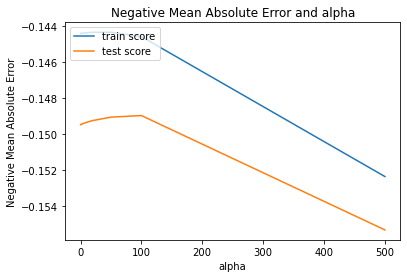

In [97]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [98]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[base_col1], y_train)
ridge.coef_

array([ 0.05394548, -0.0364639 ,  0.04037118,  0.11229311,  0.03862686,
        0.03548115,  0.04964128,  0.03061721, -0.03669931,  0.00773654,
        0.0135054 ,  0.00119787,  0.01297111,  0.04087601, -0.05578453,
       -0.028102  ,  0.02062979,  0.01922208,  0.08553806, -0.09274073])

In [99]:
# list of alphas to tune
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [100]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train[base_col1], y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003813,0.001203,0.002209,0.001154,0.0001,{'alpha': 0.0001},-0.137200,-0.152160,-0.163987,-0.145469,-0.148530,-0.149469,0.008780,3,-0.146429,-0.143668,-0.141885,-0.146305,-0.143762,-0.144410,0.001733
1,0.003609,0.000880,0.002754,0.000683,0.001,{'alpha': 0.001},-0.136748,-0.151926,-0.163765,-0.145823,-0.148767,-0.149406,0.008786,1,-0.146610,-0.143733,-0.141873,-0.146370,-0.143822,-0.144482,0.001783
2,0.003339,0.000399,0.002573,0.000952,0.002,{'alpha': 0.002},-0.136256,-0.151907,-0.163600,-0.146323,-0.149042,-0.149425,0.008835,2,-0.146828,-0.143914,-0.141972,-0.146502,-0.143954,-0.144634,0.001810
3,0.003795,0.000521,0.002518,0.001146,0.003,{'alpha': 0.003},-0.135810,-0.151953,-0.163561,-0.146907,-0.149366,-0.149519,0.008920,4,-0.147094,-0.144188,-0.142222,-0.146666,-0.144140,-0.144862,0.001799
4,0.003686,0.002342,0.003059,0.000890,0.004,{'alpha': 0.004},-0.135451,-0.152121,-0.163732,-0.147581,-0.149746,-0.149726,0.009058,5,-0.147434,-0.144458,-0.142493,-0.146875,-0.144400,-0.145132,0.001805


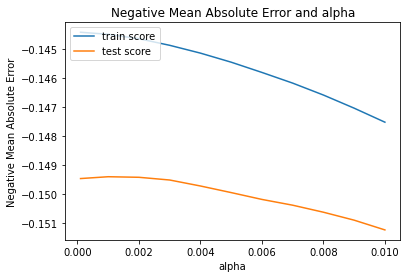

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [103]:
#Fit the model with optimal alpha for both ridge and Lasso regressions.
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[base_col1], y_train)
ridge.coef_

array([ 0.05394548, -0.0364639 ,  0.04037118,  0.11229311,  0.03862686,
        0.03548115,  0.04964128,  0.03061721, -0.03669931,  0.00773654,
        0.0135054 ,  0.00119787,  0.01297111,  0.04087601, -0.05578453,
       -0.028102  ,  0.02062979,  0.01922208,  0.08553806, -0.09274073])

In [104]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[base_col1], y_train) 
lasso.coef_

array([ 0.05391623, -0.0389826 ,  0.03991484,  0.11936486,  0.03792936,
        0.03647856,  0.05080871,  0.03207564, -0.03727697,  0.00876047,
        0.01443005,  0.        ,  0.01137502,  0.0420921 , -0.05624657,
       -0.02844376,  0.01908695,  0.01375782,  0.08838065, -0.0975762 ])

In [105]:
#Results - Model 3 
Ridge_train_score = ridge.score(X_train[base_col1],y_train)
Ridge_test_score = ridge.score(X_test[base_col1], y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train[base_col1],y_train)
Lasso_test_score = lasso.score(X_test[base_col1], y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))  


Ridge_train_score 0.767830426835514
Ridge_test_score 0.7508268976753248
Adjusted_R2_score_Ridge_Train 0.7160516011657365
Adjusted_R2_score_Ridge_Test 0.6952559180201815
Lasso_train_score 0.7690350957636618
Lasso_test_score 0.7494971208455274
Adjusted_R2_score_Lasso_Train 0.7175249372649102
Adjusted_R2_score_Lasso_Test 0.69362957225712


In [106]:
model_coefficients=pd.DataFrame(X_train[base_col1].columns)
model_coefficients['Ridge_Coeff']=pd.DataFrame(ridge.coef_)
model_coefficients['Lasso_Coeff']=pd.DataFrame(lasso.coef_)

In [107]:
model_coefficients

,0,Ridge_Coeff,Lasso_Coeff
0,BsmtFinSF1,0.053945,0.053916
1,Condition2_PosN,-0.036464,-0.038983
2,FireplaceQu_Gd,0.040371,0.039915
3,GarageCars,0.112293,0.119365
4,LotArea,0.038627,0.037929
5,MSZoning_FV,0.035481,0.036479
6,MSZoning_RL,0.049641,0.050809
7,Neighborhood_Crawfor,0.030617,0.032076
8,OverallCond_3,-0.036699,-0.037277
9,OverallCond_6,0.007737,0.008760


In [108]:
#model_coefficients.to_csv('model_coefficients_new.csv')